In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

pd.set_option('display.max_columns', None)

**Data Dictionary**

ID : Unique Customer ID

Gender : Gender of the applicant

DOB : Date of Birth of the applicant

Lead_Creation_Date : Date on which Lead was created

City_Code : Anonymised Code for the City

City_Category: Anonymised City Feature

Employer_Code: Anonymised Code for the Employer

Employer_Category1 : Anonymised Employer Feature

Employer_Category2: Anonymised Employer Feature

Monthly_Income : Monthly Income in Dollars

Customer_Existing_Primary_Bank_Code : Anonymised Customer Bank Code

Primary_Bank_Type: Anonymised Bank Feature

Contacted: Contact Verified (Y/N)

Source : Categorical Variable representing source of lead

Source_Category: Type of Source

Existing_EMI : EMI of Existing Loans in Dollars

Loan_Amount: Loan Amount Requested

Loan_Period: Loan Period (Years)

Interest_Rate: Interest Rate of Submitted Loan Amount

EMI: EMI of Requested Loan Amount in dollars

Var1: Anonymized Categorical variable with multiple levels

Approved: (Target) Whether a loan is Approved or not (1-0) . Customer is Qualified Lead or not (1-0)

In [3]:
leads = pd.read_csv("bank_loan_leads/train_loan/train.csv")

In [4]:
leads.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
0,APPC90493171225,Female,23/07/79,15/07/16,C10001,A,COM0044082,A,4.0,2000.0,...,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
1,APPD40611263344,Male,07/12/86,04/07/16,C10003,A,COM0000002,C,1.0,3500.0,...,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0
2,APPE70289249423,Male,10/12/82,19/07/16,C10125,C,COM0005267,C,4.0,2250.0,...,Y,S143,B,0.0,45000.0,4.0,NaN,NaN,0,0
3,APPF80273865537,Male,30/01/89,09/07/16,C10477,C,COM0004143,A,4.0,3500.0,...,Y,S143,B,0.0,92000.0,5.0,NaN,NaN,7,0
4,APPG60994436641,Male,19/04/85,20/07/16,C10002,A,COM0001781,A,4.0,10000.0,...,Y,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,0


In [42]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69713 entries, 0 to 69712
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   ID                                   69713 non-null  object        
 1   Gender                               69713 non-null  object        
 2   DOB                                  69698 non-null  datetime64[ns]
 3   Lead_Creation_Date                   69713 non-null  object        
 4   City_Code                            68899 non-null  object        
 5   City_Category                        68899 non-null  object        
 6   Employer_Code                        65695 non-null  object        
 7   Employer_Category1                   65695 non-null  object        
 8   Employer_Category2                   65415 non-null  float64       
 9   Monthly_Income                       69713 non-null  float64       
 10  Customer_E

In [49]:
leads.describe().T

,count,mean,min,25%,50%,75%,max,std
DOB,69698,1989-07-21 19:18:26.269907328,1969-01-01 00:00:00,1983-09-29 00:00:00,1987-11-06 00:00:00,1991-01-25 00:00:00,2068-12-28 00:00:00,NaN
Employer_Category2,65415.0,3.720187,1.0,4.0,4.0,4.0,4.0,0.807374
Monthly_Income,69713.0,5622.2832,0.0,1650.0,2500.0,4000.0,38383838.3,174767.06184
Existing_EMI,69662.0,360.928751,0.0,0.0,0.0,350.0,545436.5,2288.517927
Loan_Amount,42004.0,39429.982859,5000.0,20000.0,30000.0,50000.0,300000.0,30727.59599
Loan_Period,42004.0,3.890629,1.0,3.0,4.0,5.0,6.0,1.167491
Interest_Rate,22276.0,19.21357,11.99,15.25,18.0,20.0,37.0,5.847136
EMI,22276.0,1101.466242,118.0,649.0,941.0,1295.0,13556.0,752.661394
Var1,69713.0,3.948446,0.0,0.0,2.0,7.0,10.0,3.819214
Approved,69713.0,0.014631,0.0,0.0,0.0,0.0,1.0,0.120073


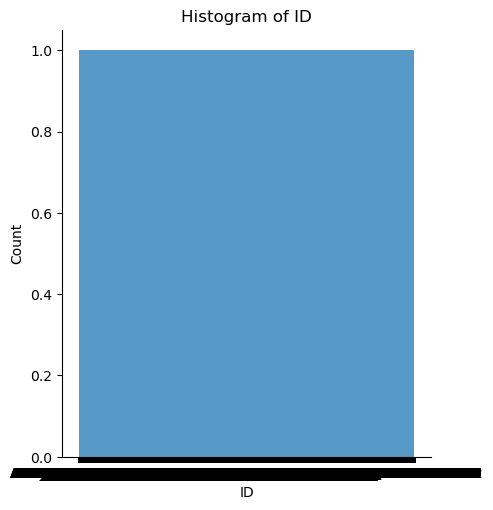

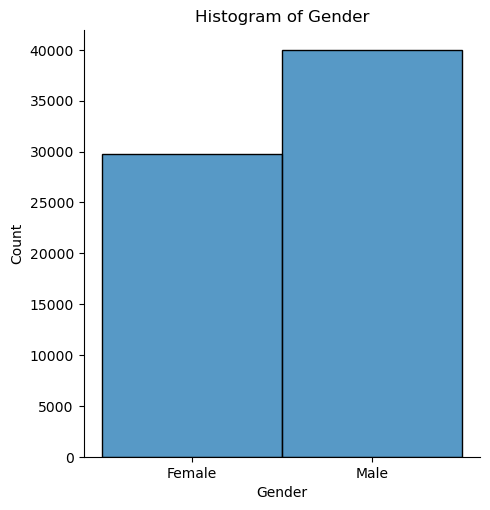

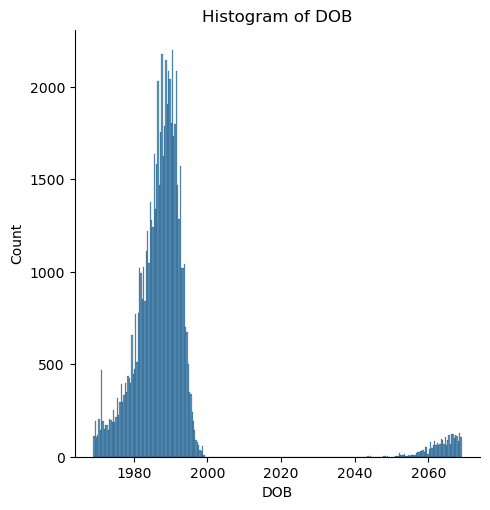

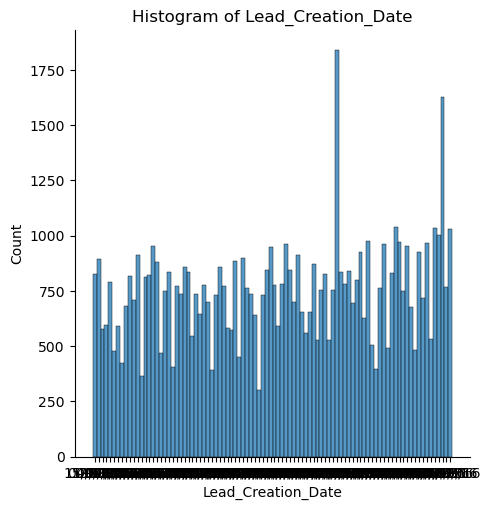

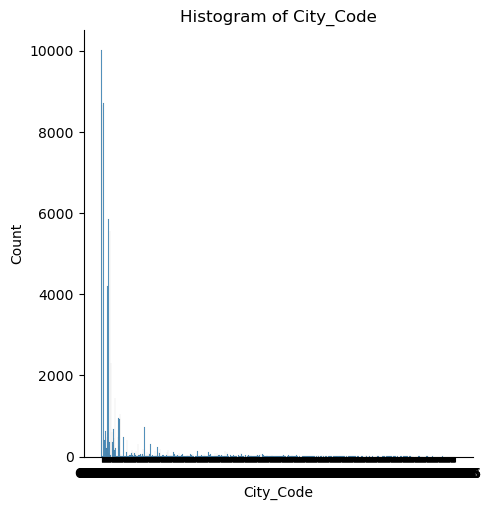

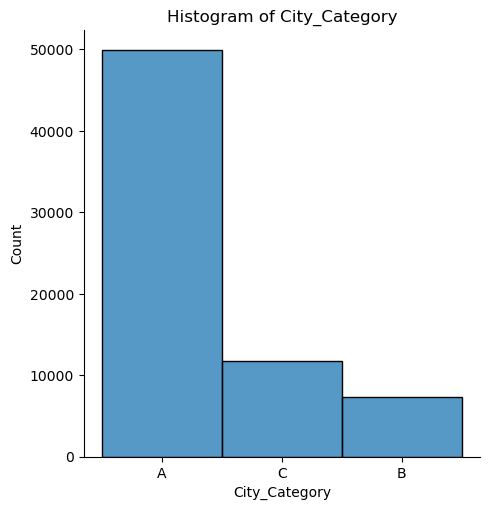

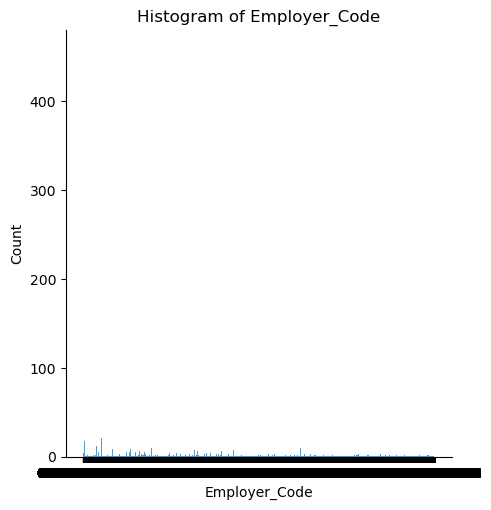

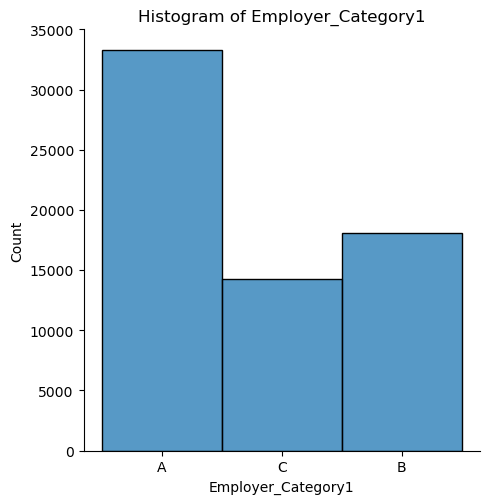

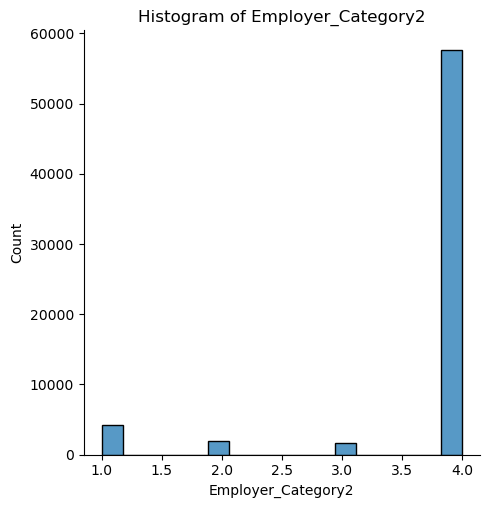

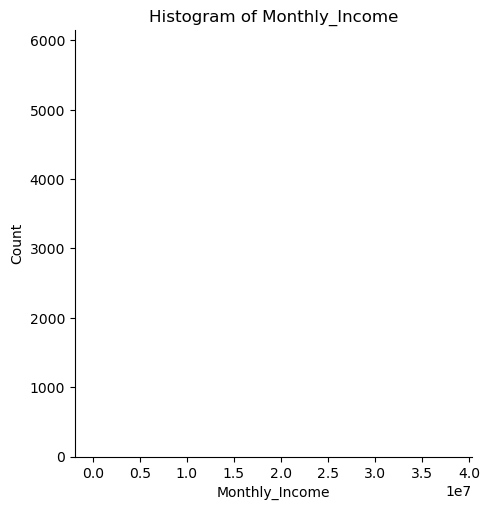

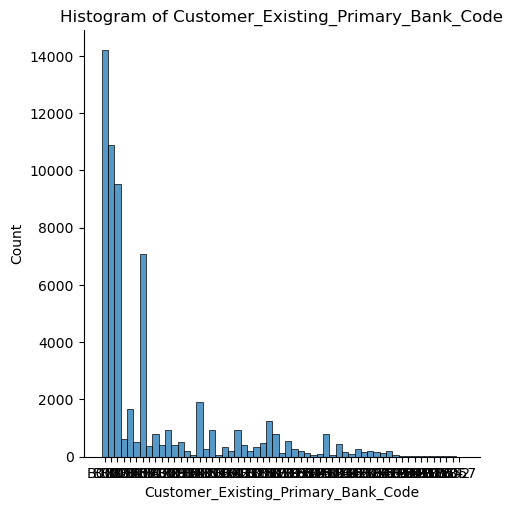

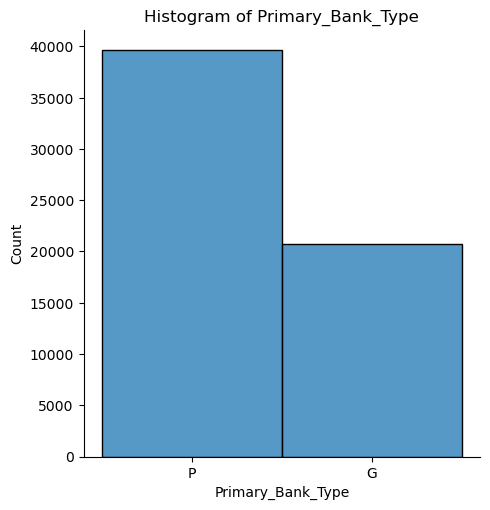

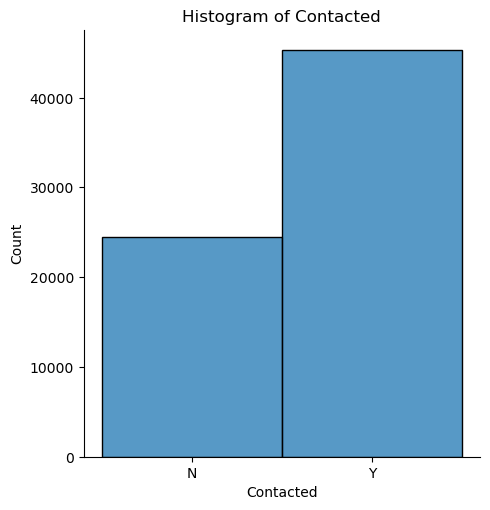

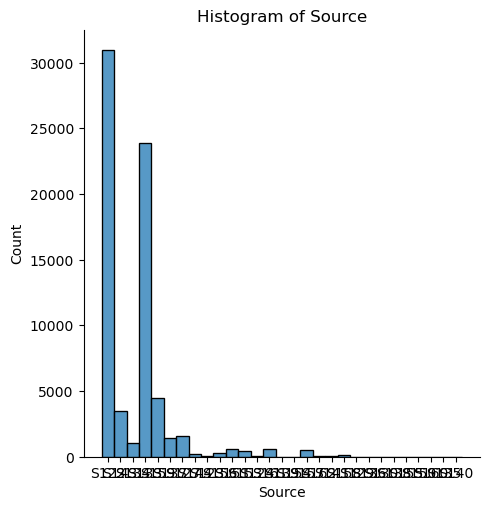

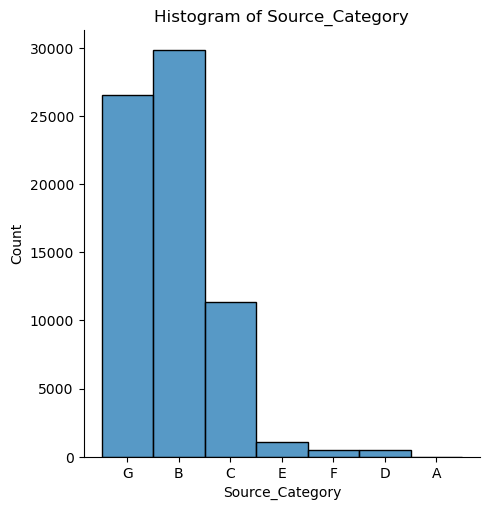

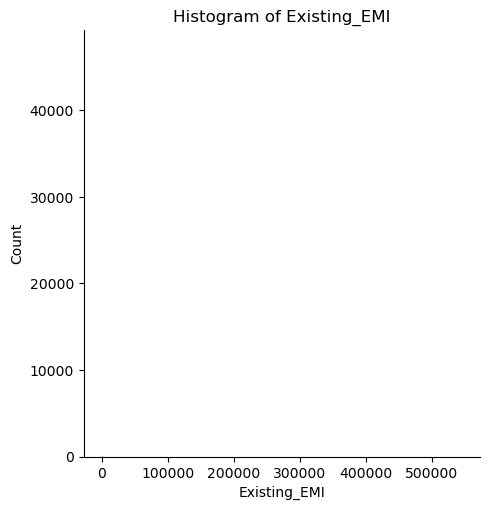

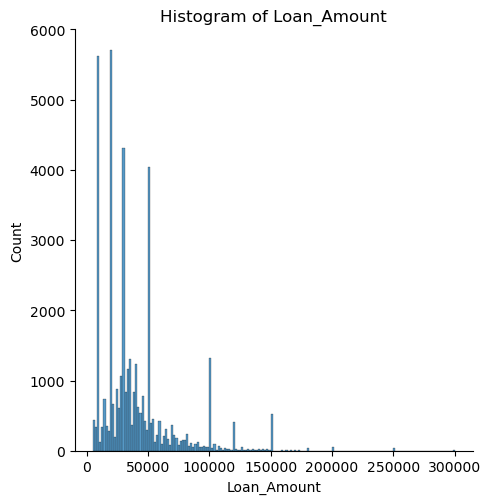

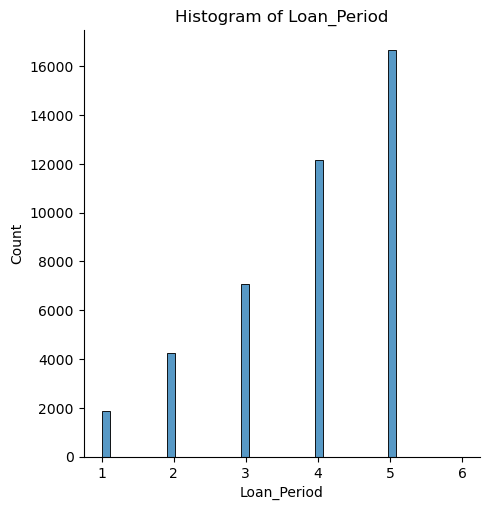

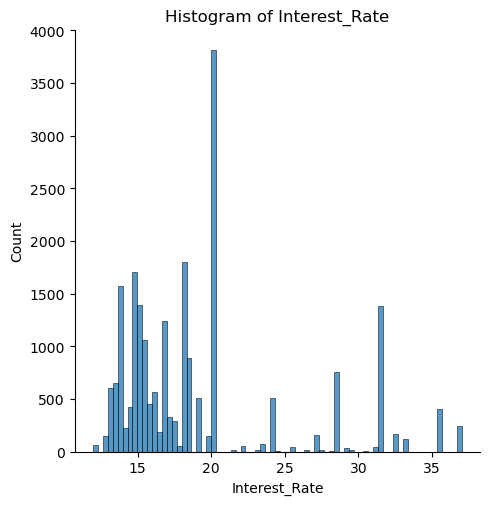

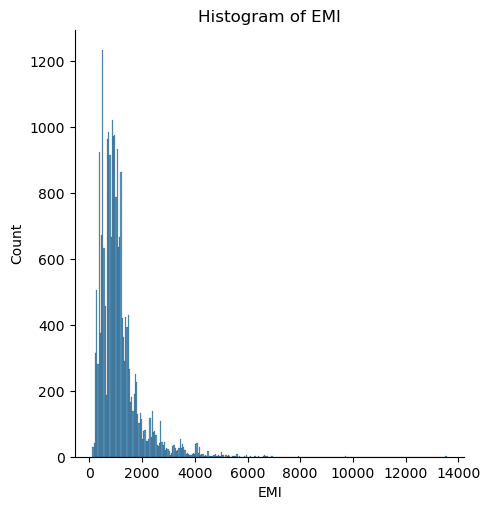

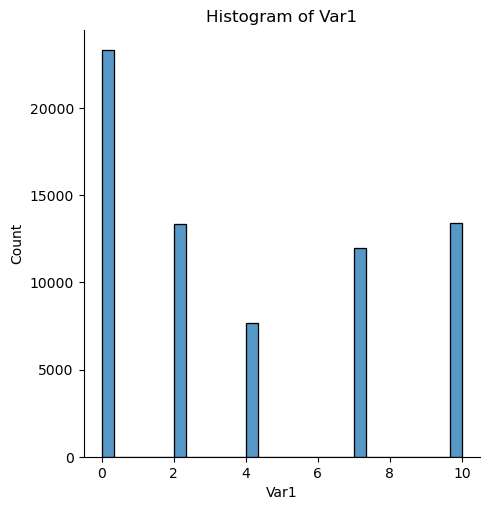

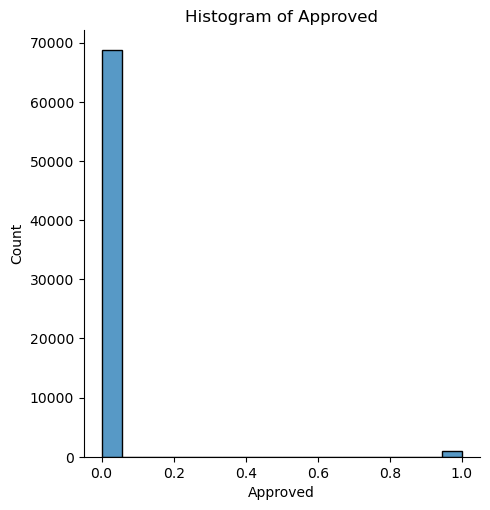

In [47]:
def draw_hists(data, columns):
    for column in columns:
        sns.displot(data, x=column)
        plt.title(f"Histogram of {column}")
        plt.show()
cols = leads.columns
draw_hists(leads, cols)

In [57]:
leads['Existing_EMI'].sort_values(ascending=False).head(20)

20442    545436.5
38031     62626.6
14827     42000.0
14828     42000.0
26628     30000.0
62827     30000.0
41379     27300.0
57082     25000.0
39975     22500.0
39787     20000.0
46593     20000.0
29624     20000.0
6328      18500.0
60841     18000.0
40084     15100.0
14861     15000.0
59853     15000.0
16485     15000.0
62689     15000.0
16948     15000.0
Name: Existing_EMI, dtype: float64

# Data Processing

## Handle missing values

In [41]:
leads.isnull().sum()

ID                                         0
Gender                                     0
DOB                                       15
Lead_Creation_Date                         0
City_Code                                814
City_Category                            814
Employer_Code                           4018
Employer_Category1                      4018
Employer_Category2                      4298
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code     9391
Primary_Bank_Type                       9391
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                              51
Loan_Amount                            27709
Loan_Period                            27709
Interest_Rate                          47437
EMI                                    47437
Var1                                       0
Approved                                   0
dtype: int

### For each column, check how many of the observations with missing values were Approved for a loan

In [75]:
def check_missing_approved(data):
    cols_missing = [col for col in data.columns if data[col].isnull().any()]
    missing_cols_approved = []
    total_missing = []
    vals = []
    percent_missing = []
    for col in cols_missing:
        approved_count = data[data[col].isnull() & (data['Approved'] == 1)].shape[0]
        missing_cols_approved.append(approved_count)
        total_missing_count = data[col].isnull().sum()
        total_missing.append(total_missing_count)
        val_count = data[col].nunique()
        vals.append(val_count)
        pct = np.round((total_missing_count/data[col].shape[0])*100,2)
        percent_missing.append(pct)

    result_table = pd.DataFrame({
        'Column with Missing Data': cols_missing,
        'No. of Unique Values': vals,
        'Total Missing': total_missing,
        'Percentage Missing': percent_missing,
        'Approved Count': missing_cols_approved
        
    })

    return result_table

check_missing_approved(leads)

,Column with Missing Data,No. of Unique Values,Total Missing,Percentage Missing,Approved Count
0,DOB,10759,15,0.02,0
1,City_Code,678,814,1.17,2
2,City_Category,3,814,1.17,2
3,Employer_Code,36617,4018,5.76,5
4,Employer_Category1,3,4018,5.76,5
5,Employer_Category2,4,4298,6.17,13
6,Customer_Existing_Primary_Bank_Code,57,9391,13.47,20
7,Primary_Bank_Type,2,9391,13.47,20
8,Existing_EMI,3245,51,0.07,1
9,Loan_Amount,196,27709,39.75,175


Given that there are so few observations in which Approved==1, this will help us decide if we can afford to delete rows with missing values. 

**DOB** - drop rows with missing

**City_Code** - impute missing values with median

**City_Category** - impute with mode

**Employer_Code** - drop column, too many categories to be of use

**Empoloyer_Category1** - impute with mode

**Employer_Category2** - impute with mode

**Customer_Existing_Primary_Bank_Code** - we can impute with median, but I don't think this feature will render much value 

**Primary_Bank_Type** - impute with mode 

**Existing_EMI** - impute with mean, or drop rows

**Loan_Amount** - check distribution, if skewed use median, else mean

**Loan_Period** - impute with median if skewed, else use mean

**Interest_Rate** - drop feature

**EMI** - drop feature 

### Remove observations with missing DOB, Existing EMI values 

# Multivariate Analysis

In [5]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69713 entries, 0 to 69712
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   69713 non-null  object 
 1   Gender                               69713 non-null  object 
 2   DOB                                  69698 non-null  object 
 3   Lead_Creation_Date                   69713 non-null  object 
 4   City_Code                            68899 non-null  object 
 5   City_Category                        68899 non-null  object 
 6   Employer_Code                        65695 non-null  object 
 7   Employer_Category1                   65695 non-null  object 
 8   Employer_Category2                   65415 non-null  float64
 9   Monthly_Income                       69713 non-null  float64
 10  Customer_Existing_Primary_Bank_Code  60322 non-null  object 
 11  Primary_Bank_Type           

In [6]:
leads.describe().T

,count,mean,std,min,25%,50%,75%,max
Employer_Category2,65415.0,3.720187,0.807374,1.00,4.00,4.0,4.0,4.0
Monthly_Income,69713.0,5622.283200,174767.061840,0.00,1650.00,2500.0,4000.0,38383838.3
Existing_EMI,69662.0,360.928751,2288.517927,0.00,0.00,0.0,350.0,545436.5
Loan_Amount,42004.0,39429.982859,30727.595990,5000.00,20000.00,30000.0,50000.0,300000.0
Loan_Period,42004.0,3.890629,1.167491,1.00,3.00,4.0,5.0,6.0
Interest_Rate,22276.0,19.213570,5.847136,11.99,15.25,18.0,20.0,37.0
EMI,22276.0,1101.466242,752.661394,118.00,649.00,941.0,1295.0,13556.0
Var1,69713.0,3.948446,3.819214,0.00,0.00,2.0,7.0,10.0
Approved,69713.0,0.014631,0.120073,0.00,0.00,0.0,0.0,1.0


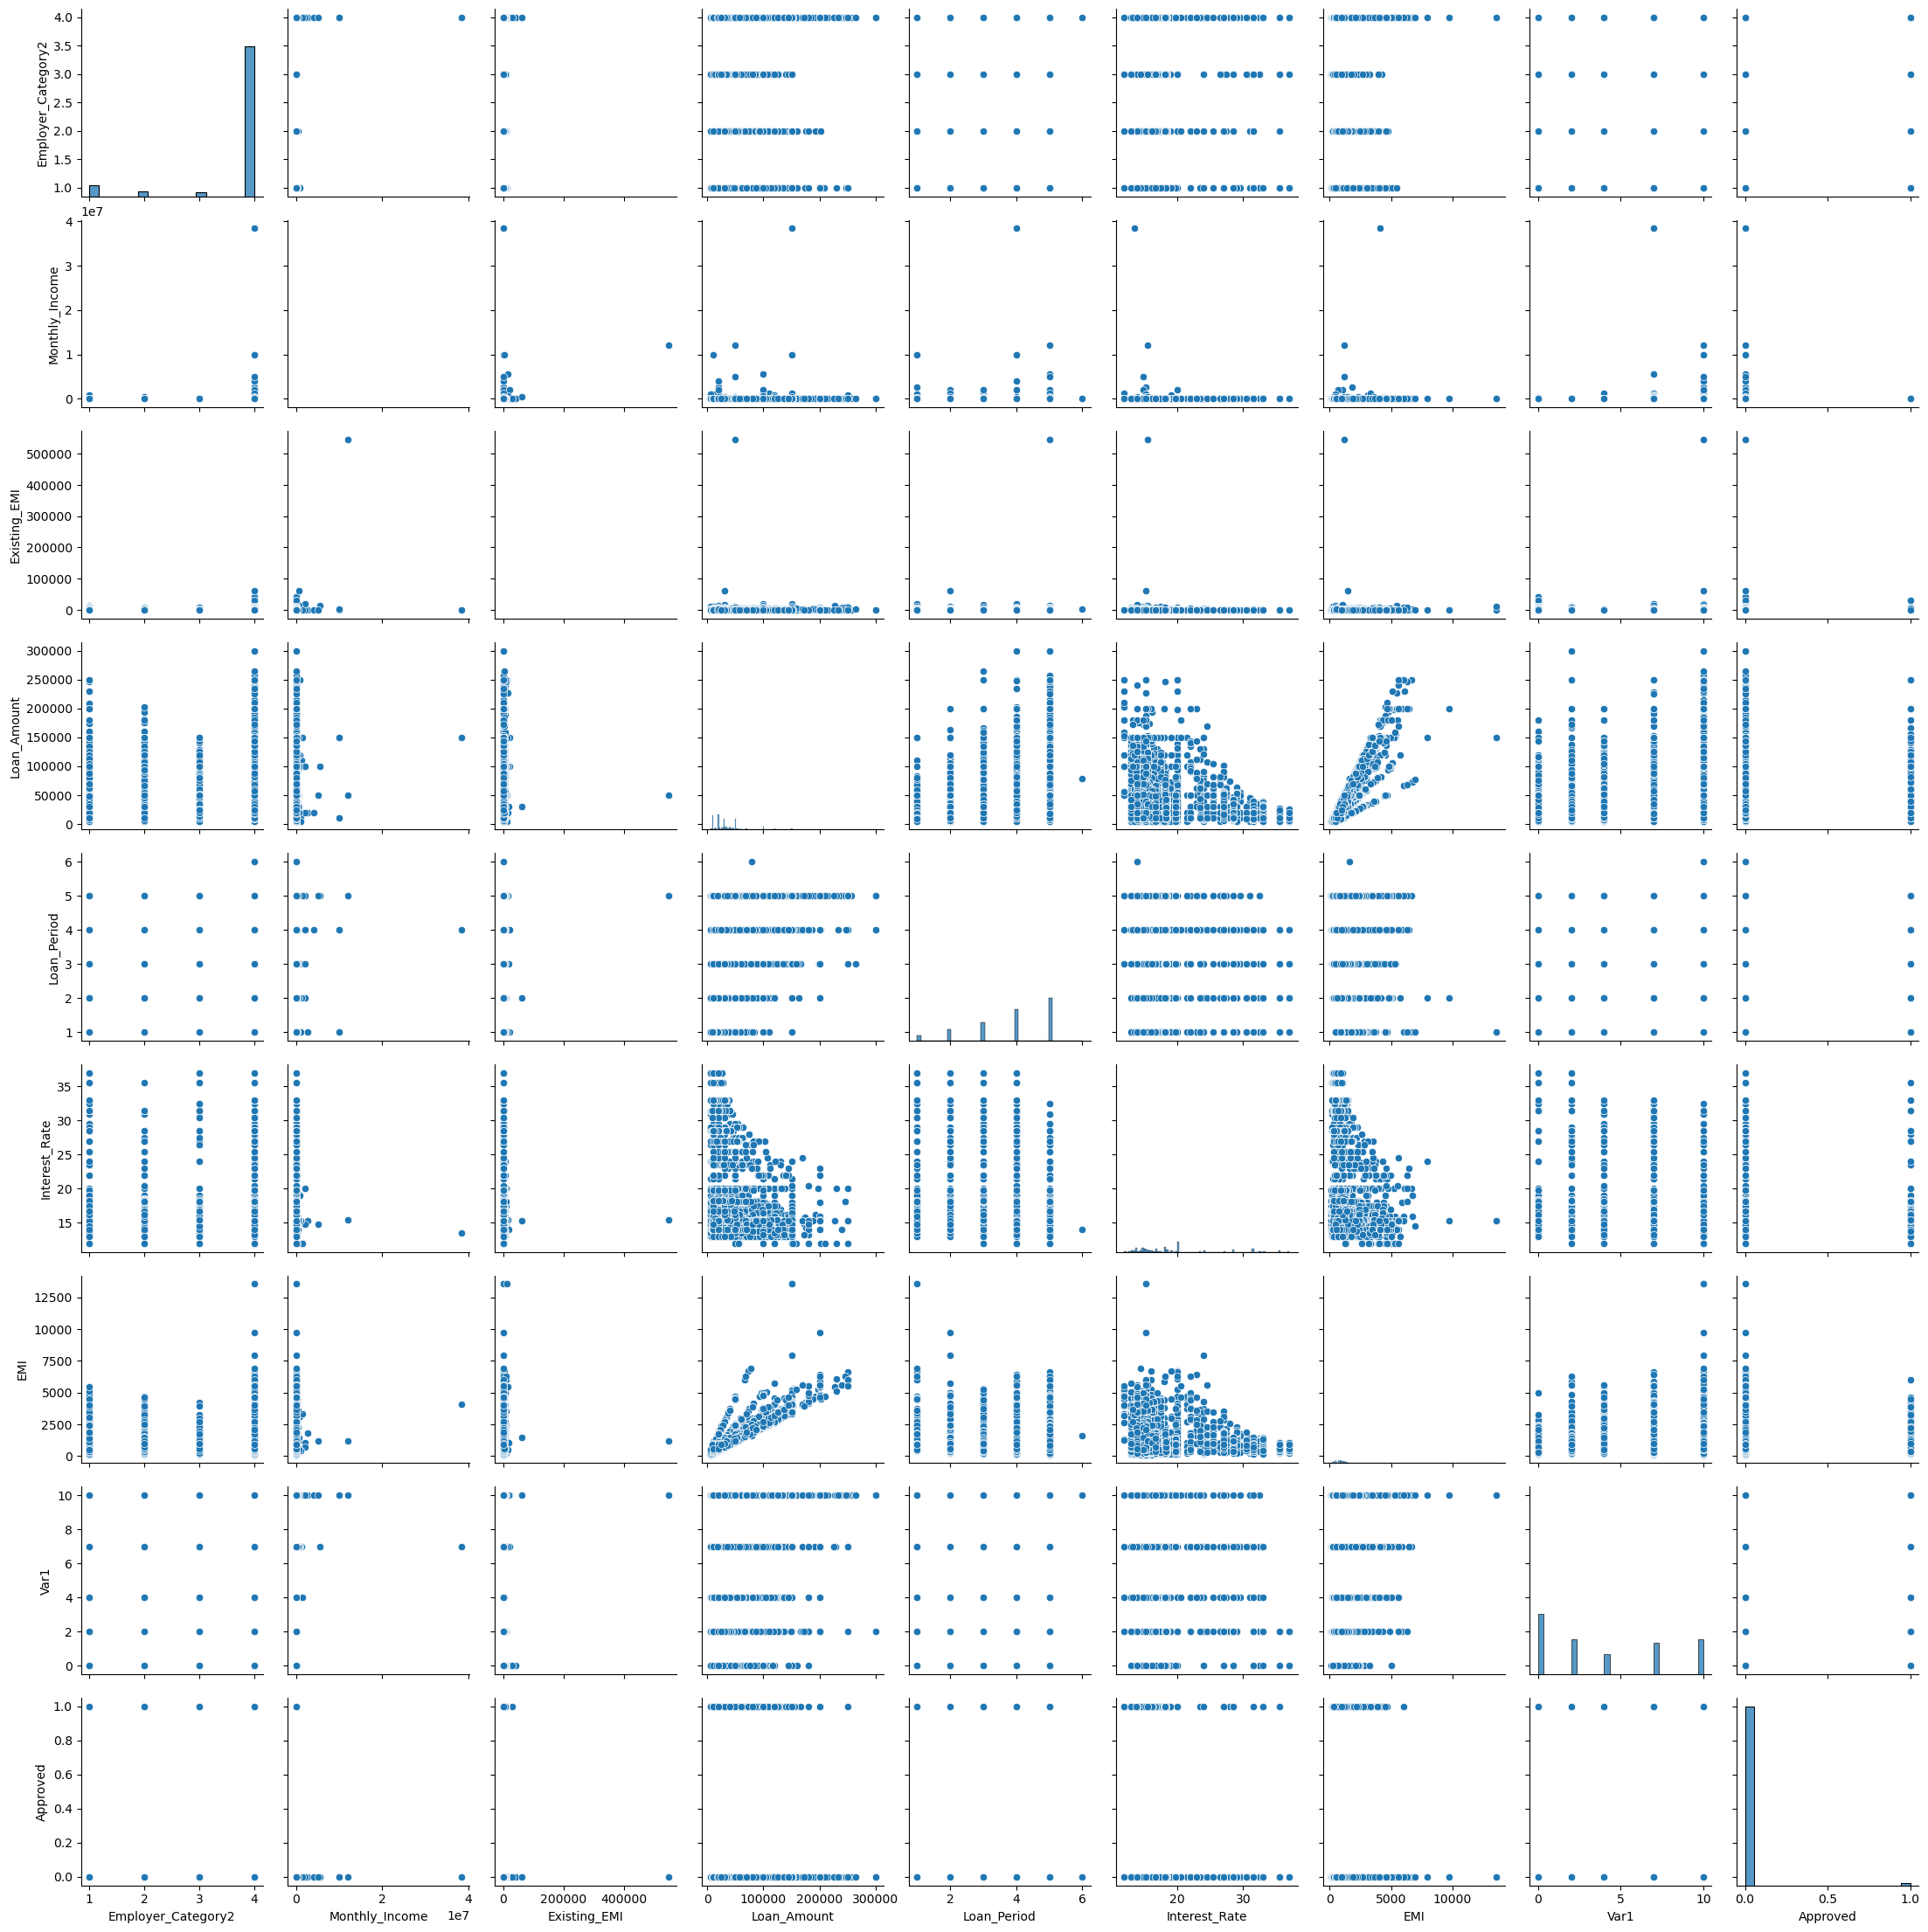

In [9]:
sns.pairplot(leads)


# Univariate analysis



## Datatypes

 ## Missing values

## Outliers

## Anomalies

In [ ]:
dob_dt = pd.to_datetime(leads['DOB'], format="%d/%m/%y")
leads['DOB'] = dob_dt

def age(births):
    current_year = datetime.today().year
    ages=[]
    for x in births:
        birth_year = datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").year
        ages.append(current_year - birth_year)
    return ages
print(age(leads['DOB']))
